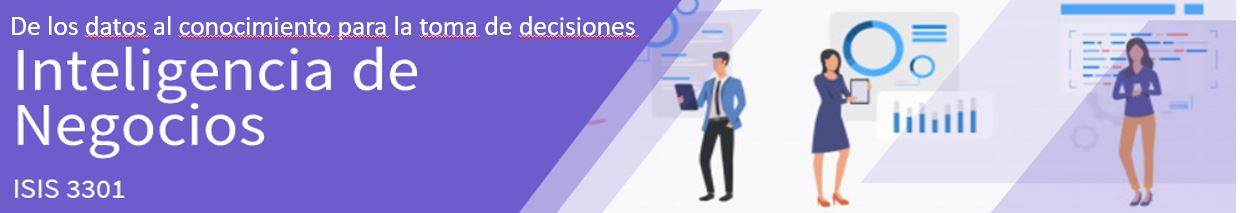

## Tarea de agrupamiento por similitud

El objetivo de este notebook es mostrar cómo resolver una tarea de agrupamiento por similitud o clustering utilizando la librería scikit-learn. Tomaremos como caso de estudio SpotiAlpes con los datos del conjunto de canciones y veremos cómo realizar la preparación de los datos para el algoritmo de k-means. También conocerás algunas métricas para evaluar un modelo de clustering. Además, veremos cómo ajustar los hiperparámetros del algoritmo. 

En esta ocasión, trabajaremos por iteraciones con el fin de mostrar un avance a SpotiAlpes. Se sugiere realizar tres iteraciones:

* **Iteración1.** Primer modelo con lo que el grupo sabe o se imagina
* **Iteración2.** Segundo modelo con mejoras a nivel de preparación de datos y configuración de hiper-parámetros
* **Iteración3.** Modelo final que incluye mejoras identificadas al revisar mejor la literatura, en la interacción con el profesor(a) o escuchando comentarios de compañeros.

En cada iteración es posible que intervengan los siguientes pasos:
1. Preparación de los datos para el modelado.
2. Creación de un modelo de k-means.
3. Validación y ajuste de hiperparámetros propios del algoritmo de k-means.
4. Evaluación del modelo.
5. Interpretación del modelo con base en los objetivos de negocio.

## Caso
SpotiAlpes está organizando su repertorio de canciones y quiere tener grupos que faciliten su organización y el comprender qué tipo de música están compartiendo en la plataforma. La idea es definir en cual o cuales de esos grupos quiere enfocarse para aumentar el número de visitantes a la página.

## Referencias

1. [Python Data Science Notebook]("https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html")
2. [Datos a utilizar: PrepTrack.csv]("...")

## 1. Carga de librerías necesarias para implementación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


## 2. Cargar los datos

In [2]:
# Se cargan los datos. 
df_tracks=pd.read_csv('PrepTracks.csv', sep=',', encoding = 'utf-8', index_col=0)

## 3. Perfilamiento y entendimiento de los datos 

In [3]:
df_tracks.shape

(100000, 22)

In [4]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,decibel_range,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,first_artist,second_artist
280776,1P2kvbKXc8lomaeMoS1GPd,Tipota Den Pai Hameno,6.0,246467,0.0,"[""Haris Alexiou""]",['4cgCxnsmy9kDcl3oA2BYRY'],1979-05-02,0.399,0.397,...,NaN,0.0260,0.638,0.000000,0.1170,0.475,93.146,4.0,Haris Alexiou,NaN
413741,3cfsrtjbPNbgcmgSRsJgbN,Tu Enamorado,34.0,157800,0.0,"[""José Alfredo Jimenez""]",['2T06whb4s6UiufL1j5Qtz9'],1999-12-31,0.454,0.470,...,NaN,0.0413,0.793,0.000000,0.0750,0.857,148.411,3.0,José Alfredo Jimenez,NaN
347767,2yuyaYAELoMG4ApV5wJsWR,Curve (feat. The Weeknd),62.0,161990,1.0,"[""Gucci Mane"", ""The Weeknd""]","['13y7CgLHjMVRMDqxdx0Xdo', '1Xyo4u8uXC1ZmMpatF...",2017-10-13,0.760,0.476,...,NaN,0.2410,0.294,0.000000,0.1000,0.354,147.010,4.0,Gucci Mane,The Weeknd
25439,4dyemWgZn8CG9qneSpcQA3,Tennessee Waltz,12.0,179293,0.0,"[""Pee Wee King & His Golden West Cowboys""]",['3iywlJzFl8iYgp3112qt31'],1952-06-13,0.541,0.153,...,NaN,0.0352,0.912,0.000290,0.0979,0.675,114.834,3.0,Pee Wee King & His Golden West Cowboys,NaN
65901,4J2nhinyaIxkoGh9vw5UbI,Have I Told You Lately - Live Unplugged; 2008 ...,47.0,243947,0.0,"[""Rod Stewart""]",['2y8Jo9CKhJvtfeKOsYzRdT'],1993-05-01,0.476,0.331,...,NaN,0.0427,0.792,0.000004,0.7160,0.315,66.825,4.0,Rod Stewart,NaN


In [5]:
# Revisar las características de los datos: completitud y tipo de dato
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 280776 to 206877
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                99893 non-null   object 
 1   name              99888 non-null   object 
 2   popularity        99910 non-null   float64
 3   duration_ms       100000 non-null  int64  
 4   explicit          99908 non-null   float64
 5   artists           100000 non-null  object 
 6   id_artists        100000 non-null  object 
 7   release_date      99911 non-null   object 
 8   danceability      99909 non-null   float64
 9   energy            99907 non-null   float64
 10  loudness          99893 non-null   float64
 11  mode              99894 non-null   object 
 12  decibel_range     155 non-null     float64
 13  speechiness       99901 non-null   float64
 14  acousticness      99911 non-null   float64
 15  instrumentalness  99900 non-null   float64
 16  liveness       

In [6]:
# Resumen de los estadisticos de las variables numéricas
df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,loudness,decibel_range,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,99910.000000,1.000000e+05,99908.000000,99909.000000,99907.000000,99893.000000,155.000000,99901.000000,99911.000000,99900.000000,99907.000000,99900.000000,99898.000000,99909.000000
mean,27.478090,2.324164e+05,0.045732,0.562213,0.542298,-10.150200,47.709677,0.092128,0.449463,0.114129,0.209558,0.551855,118.656852,3.880371
std,18.480398,1.249293e+05,0.208904,0.166364,0.252587,5.065804,29.896785,0.151199,0.349990,0.266812,0.181309,0.258919,29.701265,0.456019
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1.775600e+05,0.000000,0.451000,0.343000,-12.805000,21.000000,0.033800,0.094900,0.000000,0.097600,0.343000,95.880250,4.000000
50%,27.000000,2.160400e+05,0.000000,0.574000,0.550000,-9.181000,49.000000,0.043700,0.420000,0.000029,0.136000,0.563000,117.693000,4.000000
75%,41.000000,2.646000e+05,0.000000,0.685000,0.749000,-6.457000,73.500000,0.072900,0.787000,0.011100,0.269000,0.772000,136.513750,4.000000
max,90.000000,4.685927e+06,1.000000,0.987000,1.000000,2.572000,99.000000,0.971000,0.996000,1.000000,1.000000,1.000000,243.759000,5.000000


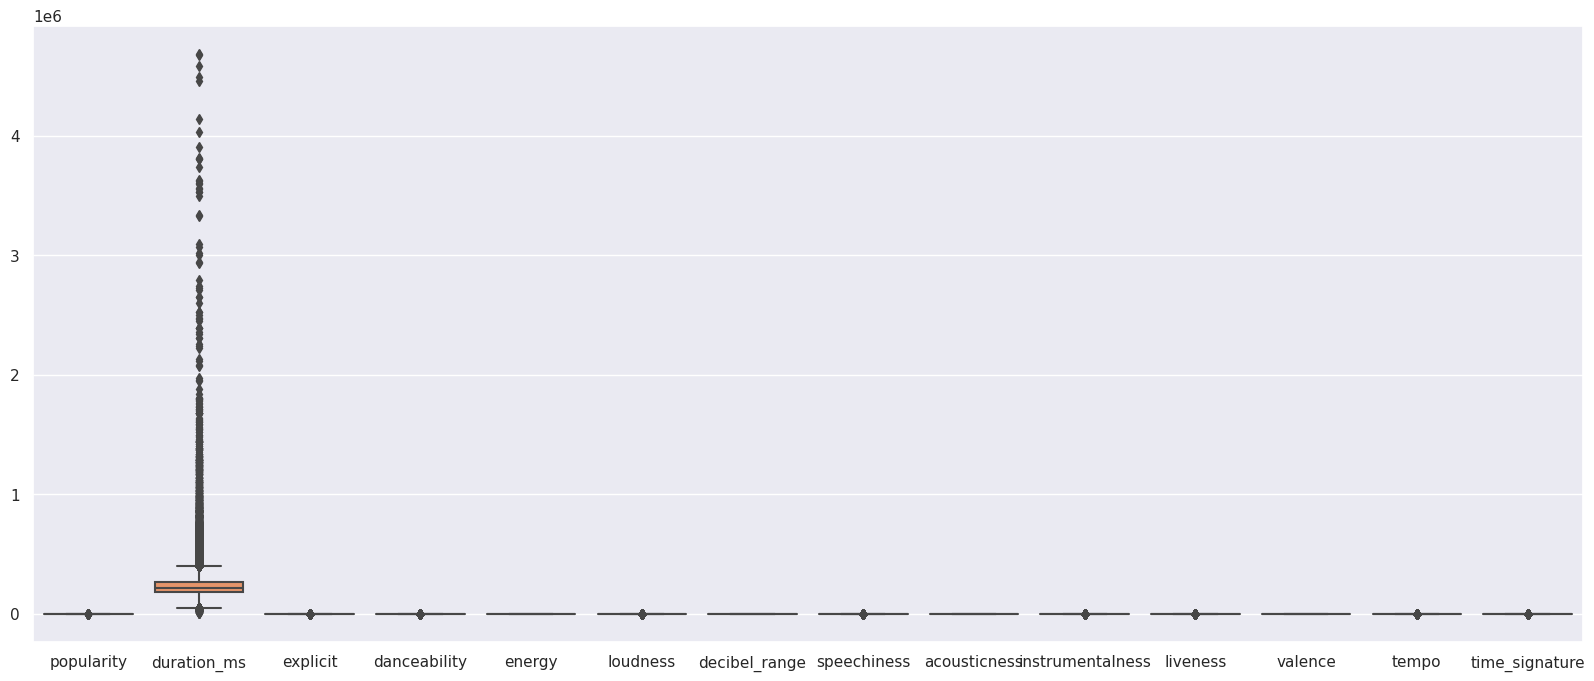

In [7]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_tracks, orient="v")

In [8]:
#Separación de la variable duración (int) de variables float para ver mejor su contenido dada la diferencia de magnitudes en el dominio
name_cols_float = df_tracks.select_dtypes(include = ['float']).columns
name_cols_int = df_tracks.select_dtypes(include = ['int64']).columns
name_cols_int
#name_cols_float

Index(['duration_ms'], dtype='object')

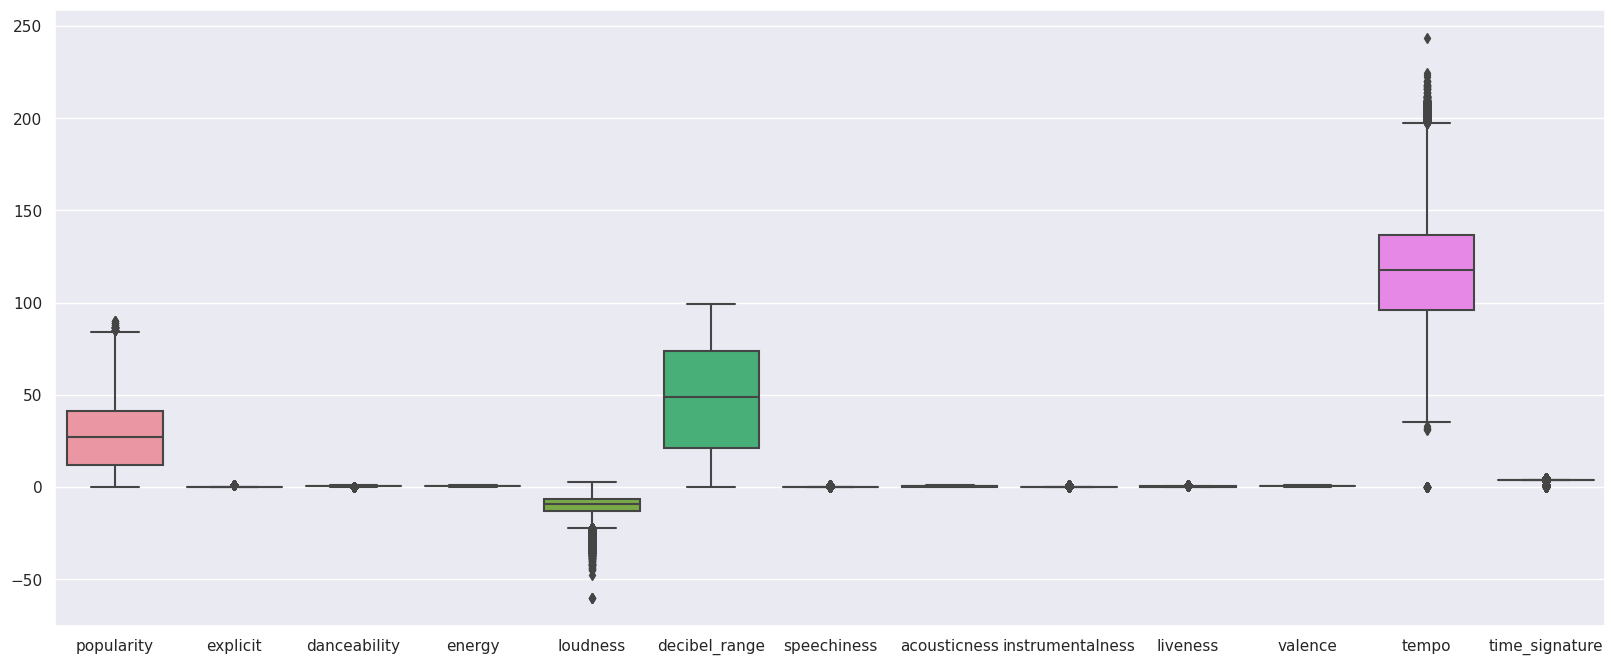

In [9]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_tracks[name_cols_float], orient="v")

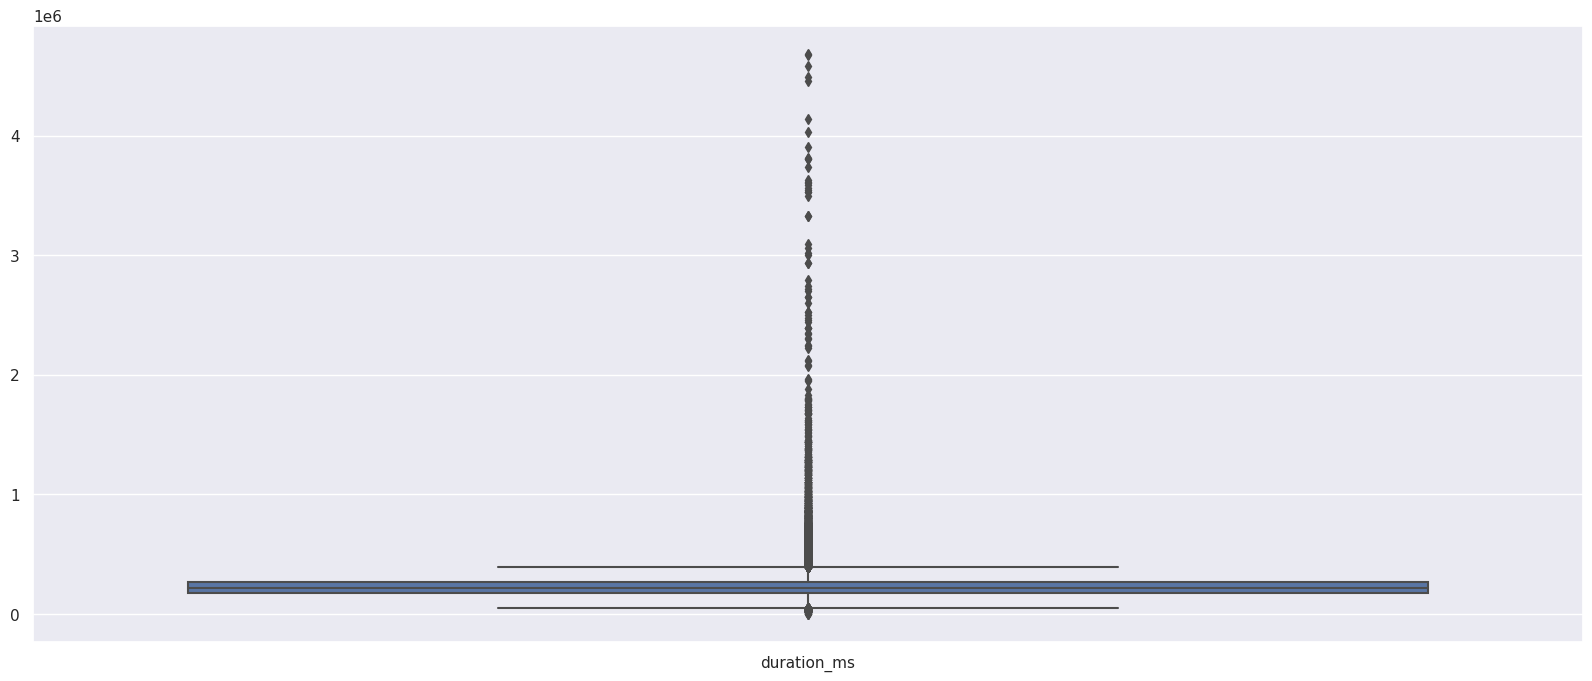

In [10]:
#Visualización de las variables numéricas tipo int
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_tracks[name_cols_int], orient="v")

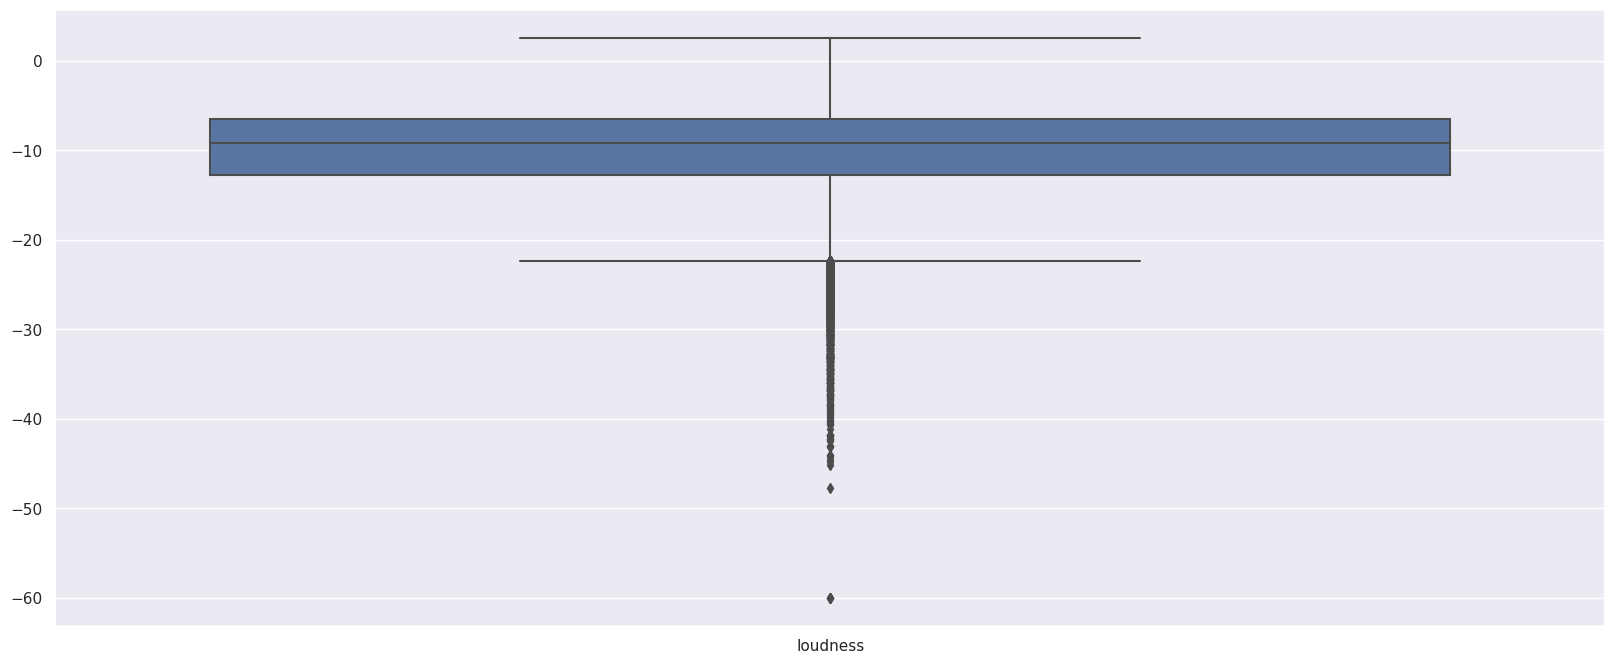

In [11]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_tracks[['loudness']], orient="v")

In [12]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_tracks.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['id', 'name', 'artists', 'id_artists', 'release_date', 'mode',
       'first_artist', 'second_artist'],
      dtype='object')

In [13]:
# Revisamos el contenido de las columnas no numéricas
df_tracks.release_date.sample(10)

541843    2013-07-24
549968     Year 2007
419120     Year 1980
477864    2010-07-30
393584    2007-04-10
110911    2012-12-27
419959    1987-01-01
353274    1983-05-05
220083    1995-02-01
476585    1985-10-21
Name: release_date, dtype: object

In [14]:
#Revisar el contenido de las variables que no son numéricas
df_tracks[name_cols_non_number].describe()

,id,name,artists,id_artists,release_date,mode,first_artist,second_artist
count,99893,99888,100000,100000,99911,99894,99988,18369
unique,99890,91341,39005,39182,14200,5,30447,9131
top,0CQPWcVvEP0YqJudrQp3Pt,Angel,"[""Lata Mangeshkar""]",['61JrslREXq98hurYL2hYoc'],1997-01-01,M,Lata Mangeshkar,Tomas Bolme
freq,2,20,242,242,506,65882,429,163


**Análisis** 
1. Observamos que artists es una lista al igual que id_artists y que first_artist y second_artist son varibles extraidas de artists.
2. La variable release_date tiene varios formatos 
3. La variable mode según el diccionario tiene el siguiente contenido:"whether the track is major (1) or minor (0)", pero no es así.

Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

In [15]:
#Consulto una muestra de datos para analizarlos mejor
df_tracks[name_cols_non_number].sample(15)

,id,name,artists,id_artists,release_date,mode,first_artist,second_artist
539594,4X2D3Z0gRtKXUV0c39ZDEL,「男」,"[""Ruriko Kuboh""]",['4PpeG1Lnx1kkiekDoPv6eu'],2007-12-19,m,Ruriko Kuboh,NaN
271508,2vH8JFJKfkAgZs1GFlOzGh,Akatsuki no Requiem,"[""Linked Horizon""]",['3eNYrVLcWfjJ9JdH9kiPJO'],2018-10-03,m,Linked Horizon,NaN
51682,2fDumE5Ic6z7jBpiq4W1vm,Les uns contre les autres - 2009 Remaster,"[""Fabienne Thibeault""]",['4TzUcfMmDAPfGU8rRM5QqS'],1978-09-10,m,Fabienne Thibeault,NaN
351244,28Ghsw4zDoTPPElepjKS26,Canım Benim Gülüm Benim,"[""Zeki Müren""]",['0ZZDIo31D35xGrXYTodWrL'],1970-01-19,M,Zeki Müren,NaN
528909,3nhEtHQHJhs7ZCyctNtUrm,Latin One,"[""Gerald Wiggins""]",['47cwltxVf4qFmwvlAPyRKM'],Year 1960,M,Gerald Wiggins,NaN
349811,55rBV2yiXCJO7kGTo2zjhF,Llévame,"[""Leo Jiménez""]",['1gNdZ0MJIRLU4utl34BdHi'],2009-04-06,M,Leo Jiménez,NaN
539221,1jlg6andnmSYdA7Ga8mHSZ,"Kinderszenen, Op. 15: トロイメライ","[""Robert Schumann"", ""Fujiko Hemming""]","['2UqjDAXnDxejEyE0CzfUrZ', '4dHQoSYxFs7VSpbMRC...",2006-09-20,M,Robert Schumann,Fujiko Hemming
372612,2a6MJ2RcR4uNuNTbQq0FvZ,Sunrise in the Third System,"[""Tangerine Dream""]",['1BGN1IdyiSR0ZYrkoKNchl'],1971-03-01,m,Tangerine Dream,NaN
196763,5n2sqthOSHHaIAE3tMtjJG,Frio en el Alma / Aqueles Ojos Verdes,"[""Bob Fleming"", ""Zito Righi""]","['0UFh87BIg0GRIOFhdDZmHs', '1dsexYxOUtGE58cWms...",1961-09-01,M,Bob Fleming,Zito Righi
458243,6QOjF2o7pDWBiUOdHzJYBp,Heart Vacancy,"[""The Wanted""]",['2NhdGz9EDv2FeUw6udu2g1'],2010-01-01,M,The Wanted,NaN


## 4. Iteración 1. Primer modelo con lo que el grupo sabe o se imagina
El objetivo de este primer modelo es comprender el funcionamiento general del algoritmo en términos de datos de entrada y resultado, con el fin de entender el aporte de esta tarea de clústering al objetivo que se planteó el negocio. 

### 4.1 Identificar las variables a utilizar - les sugerimos dos de las numéricas 

In [16]:
#name_cols_number = df_tracks.select_dtypes(include = ['float', 'int64']).columns #Todas las numéricas
#name_cols_number
name_cols_number = ['duration_ms','loudness']

### 4.2 Preparar los datos
Recordemos que debemos revisar la tarea que realizaremos con los datos por ejemplo, clustering y el algormitmo a utilizar: k-means
Al revisarlos vemos que el algoritmo trabaja únicamente con datos numéricos, así que si vamos a incluir datos no numéricos debemos transformarlos a numéricos.
En esta ocasión esta preparación no es necesaria por seleccionar datos numéricos. 

Pensemos si:  <span style="color:red"> ¿se necesitarán otras preparaciones? ¿por ejemplo, el algoritmo trabajará con datos nulos? </span>


In [17]:
#TODO: Reemplazar los valores nulos por un valor diferente al contenido actual de las columnas, en este caso por un valor de -99
# df_tracks_prep = 


In [18]:
# Ver si hay grupos naturales en los datos
sns.pairplot(df_tracks_prep.dropna(), height=3,vars=['duration_ms','loudness'],kind='scatter')

NameError: name 'df_tracks_prep' is not defined

### 4.3 Construir el modelo
¿Qué función utilizar para realizar k-means y qué parámetros requiere?

In [ ]:
# El negocio quiere que empecemos con calma, así que nos sugiere un clustering para obtener dos segmentos.
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans = kmeans.fit(df_tracks_prep)

In [ ]:
#Transformar arreglo el dataframe que trabajamos para aplicar funciones más adelante.
cols_number = df_tracks_prep.to_numpy()
cols_number

array([[ 2.46467e+05, -1.06590e+01],
       [ 1.57800e+05, -1.02550e+01],
       [ 1.61990e+05, -8.10300e+00],
       ...,
       [ 1.91333e+05, -1.25960e+01],
       [ 1.78759e+05, -8.47500e+00],
       [ 1.24598e+05, -5.09400e+00]])

In [ ]:
#Consultar el los labels del clúster asignado a cada fila 
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

Es dificil de entender el resultado general, por lo que acudimos a la visualización

### 4.4. Visualizar el resultado

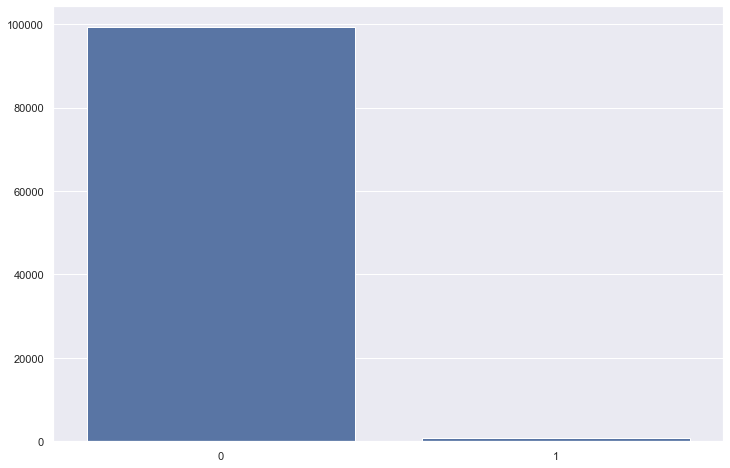

In [ ]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
df_tracks_prep['Cluster'] = labels

cluster_distrib = df_tracks_prep['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [ ]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_tracks_prep.groupby('Cluster').count()

,duration_ms,loudness
Cluster,,
0,99286,99286
1,714,714


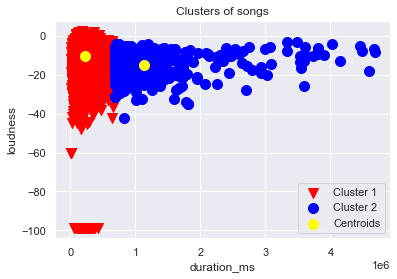

In [ ]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()


In [ ]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',name_cols_number[0], ' ' , name_cols_number[1], ']]', kmeans.cluster_centers_)

Centroides: [[ duration_ms   loudness ]] [[ 2.25943775e+05 -1.02105681e+01]
 [ 1.13247271e+06 -1.50707213e+01]]


### 4.5 Analizar y concluir
La duración es la varible que aporta más en los clústeres generados. Con respecto al volumen se observa que en el grupo de los rojos tiene registros con valores bajos y contiene los registros que originalmente eran nulos.

<span style="color:red"> ¿Qué pasaría si quito del análisis los datos nulos o los valores atípicos? </span>

## 5. Iteración2. Segundo modelo con mejoras a nivel de preparación de datos y configuración de hiper-parámetros
Te proponemos trabajar con las columnas nomralizadas, ¿entiendes por qué hacerlo? 
Además, vamos a probar con un método para la selección del parámetro k. 

### 5.1. Preparación de datos

In [ ]:
#TODO: Aplicar métodos para normalizar y estandarizar los datos, uno a la vez y concluir

mms = 


df_tracks_prep_norm = mms.fit_transform(df_tracks_prep.copy())
saved_cols = df_tracks_prep.columns

df_tracks_prep_norm = pd.DataFrame(df_tracks_prep_norm, columns =saved_cols)


In [ ]:
# Mirar  los estadísticos y revisar el resultado de la normalización
df_tracks_prep_norm.describe()

,duration_ms,loudness,Cluster
count,100000.000000,100000.000000,100000.000000
mean,0.048920,0.873811,0.007140
std,0.026680,0.057469,0.084197
min,0.000000,0.000000,0.000000
25%,0.037205,0.848482,0.000000
50%,0.045423,0.884230,0.000000
75%,0.055793,0.911088,0.000000
max,1.000000,1.000000,1.000000


### 5.2. Encontrar el número óptimo de clústeres utilizando el método del codo

In [ ]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

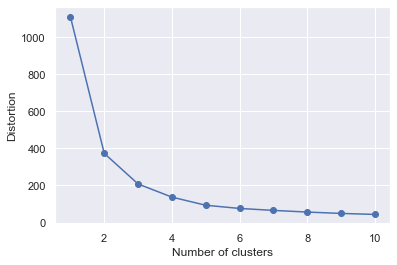

In [ ]:
plot_distortion(df_tracks_prep_norm,1,11)

### 5.3. Construir el nuevo modelo con el número de clústeres obtenido

In [ ]:
#TODO: Completar de acuerdo con la gráfica el número de clusters
N_clusters=
kmeans2 = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans2 = kmeans2.fit(df_tracks_prep_norm)


### 5.4. Visualizar el resultado

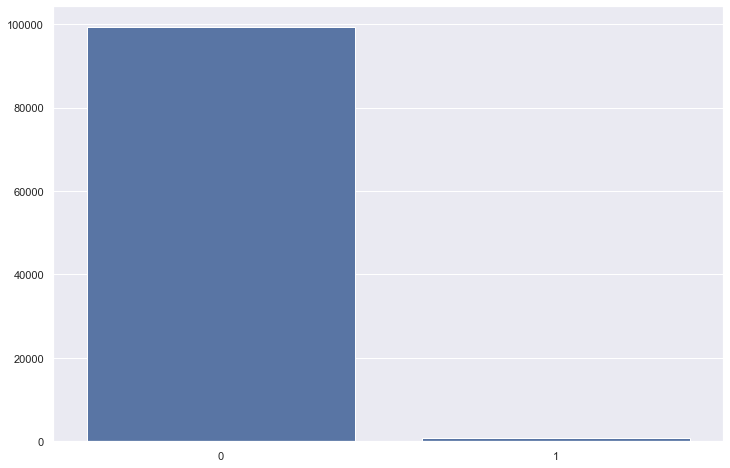

In [ ]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
df_tracks_prep_norm['Cluster'] = labels

cluster_distrib = df_tracks_prep_norm['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [ ]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_tracks_prep_norm.groupby('Cluster').count()

,duration_ms,loudness
Cluster,,
0,99286,99286
1,714,714


In [ ]:
# Consultamos algunos de los registros en el clúster 0.
cols_number[kmeans2.labels_ == 0, len(name_cols_number)-1]

array([-10.659, -10.255,  -8.103, ..., -12.596,  -8.475,  -5.094])

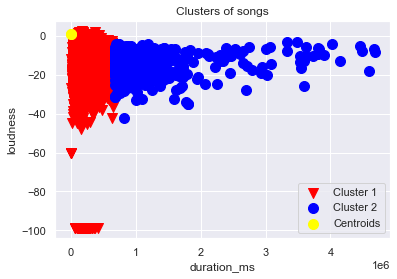

In [ ]:
# El análisis lo haremos por pareja de atributos, en este caso duration_ms y loudness
plt.scatter(cols_number[kmeans2.labels_ == 0, 0], cols_number[kmeans2.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans2.labels_ == 1, 0], cols_number[kmeans2.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()


In [ ]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',name_cols_number[0], ' ' , name_cols_number[1], ']]', kmeans2.cluster_centers_)

Centroides: [[ duration_ms   loudness ]] [[ 4.75378172e-02  8.74152639e-01 -1.69222275e-15]
 [ 2.41133732e-01  8.26303299e-01  1.00000000e+00]]


### 5.5. Evaluar la calidad de los clústeres obtenidos

In [ ]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1]


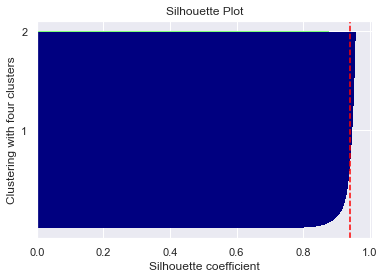

In [ ]:
# Esta función puede tardar varios minutos
plot_silhouette(data = df_tracks_prep_norm, 
                labels = kmeans2.labels_, 
                ylabel = 'Clustering with four clusters')

### 5.6 Análisis y conclusiones
<span style="color:red"> ¿Qué pasó es un mejor modelo, comparado con el primero? ¿Qué nuevas mejoras podemos incorporar?
</span>

## 6. Iteración3. Nuevo modelo con mejoras a nivel de preparación de datos 

<span style="color:red"> 
Te proponemos incluir nuevas variables y quitar los valores atípicos.
Adicionalmente, que tal incluir la variable first_artist, ¿Tiene sentido? </span>

### 6.1 Identificar las variables a utilizar 
Te sugerimos incluir algunas  columnas numéricas y una no numérica. Recuerda que es importante explicar el resultado que obtenemos al realizar esta tarea y tener demasiadas variables involucradas puede afectar esta interpretación.

In [ ]:
df_tracks.dtypes

id                   object
name                 object
popularity          float64
duration_ms           int64
explicit            float64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
loudness            float64
mode                 object
decibel_range       float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
first_artist         object
second_artist        object
dtype: object

In [ ]:
# ¿Qué pasará si se incluyen todas las variables numéricas?  ¿Será fácil la interpretación?
#name_cols_number = df_tracks.select_dtypes(include = ['float', 'int64']).columns
#df_tracks_prep2['release_date'] = df_tracks['release_date']

name_cols_number = ['duration_ms','loudness', 'release_date']
df_tracks_prep3 = df_tracks[name_cols_number].copy()


name_cols_iter3 = df_tracks_prep3.columns
name_cols_iter3


Index(['duration_ms', 'loudness', 'release_date'], dtype='object')

### 6.2 Preparación de datos
Debemos revisar con cuidado el contenido de la columna a trabajar y si es necesario limpiarlas. Adicionalmente, debimos revisar la tarea de clustering y el algoritmo a utilizar: k-means para identificar las restricciones y ver qué preparación de datos debemos realizar.

Al revisar la teoría vemos que el algoritmo trabaja únicamente con datos numéricos, así que si vamos a incluir datos no numéricos debemos transformarlos a numéricos.

<span style="color:red"> Te invitamos a revisar estas opciones: LabelEncoder y OneHotEncoder para decidir la mejor para incluir en el modelo la variable first_artist y hacerlo en una iteración posterior. ¿Tiene sentido? </span>


In [ ]:
# Propuesta: Eliminar datos atípicos, loudness < -12.805000	 De donde sale este valor de -12.805000?
# ¿Cuantas filas se borrarían?


df_tracks_prep3[df_tracks_prep3['loudness'] < -12.805000].count()


duration_ms     24972
loudness        24972
release_date    24952
dtype: int64

In [ ]:
# TODO: Eliminar datos atípicos, loudness < -12.805000	 tu puedes hacer algo similar para duration_ms

df_tracks_prep3 = 
df_tracks_prep3.describe()

,duration_ms,loudness
count,7.492100e+04,74921.000000
mean,2.315753e+05,-7.840656
std,1.083432e+05,2.662826
min,1.037100e+04,-12.805000
25%,1.826000e+05,-9.985000
50%,2.194930e+05,-7.760000
75%,2.642930e+05,-5.791000
max,4.685927e+06,2.572000


In [ ]:
# Nuestro experto insistió en incluir la información de fecha de lanzamiento, por lo cual vamos a revisar con mayor detalle esta variable
# Del perfilamienteo recuerden que vimos que la variable release_date no tenía un formato estándar 
df_tracks_prep3.release_date.sample(10)

406044     Year 1969
474252    2020-10-07
236676    2001-03-26
86411     2016-03-18
474844    1980-01-02
106148    1996-10-01
129882     Year 1924
546549    1996-01-01
504678    1983-01-01
424413    2007-01-01
Name: release_date, dtype: object

Así que debemos revisar la forma de prepararla para poderla manipular de forma correcta.
Si intentamos transforma esa variable al tipo  fecha, encontraremos un error, precisamente por el contenido de la columna.
Así que debemos corregirla!!!

In [ ]:
# Acá podrás evidenciar el error que comentamos
#df_tracks_prep3['release_date']= pd.to_datetime(df_tracks_prep3['release_date'].astype(str))

In [ ]:
# Nos preparamos para corregir el problema
# Vamos a transformar a null las fechas con errores de formato. Piensa en otras opciones para mejorar esta transformación.
df_tracks_prep3['new_release_date'] = pd.to_datetime(df_tracks_prep3.release_date, errors = 'coerce')
df_tracks_prep3['new_release_date'].sample(50)

244260   1995-07-06
227549   1984-01-01
11398           NaT
177444   1985-05-13
126488   1998-01-01
282850   1996-11-28
279762   1964-02-26
110312   2010-01-01
203097          NaT
283999   2001-04-23
547305   1965-09-28
254567   2002-01-01
50181           NaT
296354   2015-10-30
175371          NaT
512439   2013-10-06
209768   1996-03-01
523695   1967-06-01
466531   2020-10-23
295149   2009-12-01
420151          NaT
124539   1975-11-22
539175   2006-05-31
64087    1991-12-19
334918   2017-04-07
46623    1973-04-13
398039   1986-03-01
520729   1982-12-01
283826   2000-11-09
58327           NaT
42329    1969-07-05
538731   2005-04-20
557031   2011-07-02
191184   1996-05-10
271228   2017-10-04
167969   2001-04-16
302968   2007-09-06
88721    2017-12-15
429930   1994-04-18
408082   2009-01-01
564595   2006-09-29
39181           NaT
6373     1930-01-12
290889   1984-11-05
55006    1982-01-01
416814   1959-03-31
176828          NaT
14599    1940-01-24
152880   2016-04-12
314631   2015-01-01


In [ ]:
# Revisemos las fechas que tuvieron problema para su conversión y propongamos opciones de transformación
# Veamos las variables release_date y new_release_date
df_tracks_prep3.loc[df_tracks_prep3.new_release_date.isna(), ['release_date','new_release_date']] 


,release_date,new_release_date
543647,Year 2017,NaT
217407,Year 1985,NaT
146662,Year 1994,NaT
517589,Year 2004,NaT
288519,Year 1959,NaT
...,...,...
470012,Year 1969,NaT
460067,Year 1986,NaT
167936,Year 2001,NaT
1150,Year 1925,NaT


In [ ]:
# Corregimos, eliminando la palabra Year
new_dates = df_tracks_prep3.release_date[df_tracks_prep3.new_release_date.isna()]
new_dates = new_dates.apply(lambda s: pd.to_datetime(str(s).replace('Year ','')))
df_tracks_prep3.loc[df_tracks_prep3.new_release_date.isna(),'new_release_date'] = new_dates 

# Mirar resultados
df_tracks_prep3[['release_date','new_release_date']].sample(10)

,release_date,new_release_date
295028,Year 2009,2009-01-01
236266,1998-09-17,1998-09-17
338010,1990-01-01,1990-01-01
222395,2005-09-12,2005-09-12
563354,1997-11-12,1997-11-12
235634,1994-07-19,1994-07-19
59571,1987-08-31,1987-08-31
16092,1942-11-13,1942-11-13
301670,1998-11-09,1998-11-09
284823,2006-01-27,2006-01-27


In [ ]:
# De la nueva columna, podemos extraer otras columnas como año y dias transcurridos desde el lanzamiento de la canción
df_tracks_prep3['release_year'] = df_tracks_prep3.new_release_date.dt.year
df_tracks_prep3[['release_date','new_release_date','release_year']].sample(50)

,release_date,new_release_date,release_year
511829,2011-08-10,2011-08-10,2011.0
418790,1978-01-05,1978-01-05,1978.0
404048,2013-11-29,2013-11-29,2013.0
343667,Year 1958,1958-01-01,1958.0
114385,1951-12-06,1951-12-06,1951.0
53295,Year 1980,1980-01-01,1980.0
435698,1995-01-01,1995-01-01,1995.0
555829,2002-08-01,2002-08-01,2002.0
185956,Year 1971,1971-01-01,1971.0
556918,2010-09-08,2010-09-08,2010.0


**Ejercicio**

<span style="color:red"> Crear una columna que se llame *days_since_released* donde se encuentren el numero de dias que han pasado desde que se lanzó la cancion. La idea es que busquen en internet como se hace esto para practicar la búsqueda en foros.</span>

In [ ]:
# TODO: realizar el ejercicio
today = 
df_tracks_prep3['days_since_released'] = 
df_tracks_prep3[['release_date','new_release_date','release_year','days_since_released']].sample(10)

,release_date,new_release_date,release_year,days_since_released
472542,Year 2005,2005-01-01,2005.0,6093.0
431190,2006-01-01,2006-01-01,2006.0,5728.0
164315,1992-09-25,1992-09-25,1992.0,10574.0
414367,2002-08-20,2002-08-20,2002.0,6958.0
188595,1985-01-01,1985-01-01,1985.0,13398.0
397555,1983-05-01,1983-05-01,1983.0,14009.0
137319,1966-04-12,1966-04-12,1966.0,20237.0
425302,2012-07-10,2012-07-10,2012.0,3346.0
277647,2014-04-21,2014-04-21,2014.0,2696.0
131106,Year 1931,1931-01-01,1931.0,33122.0


In [ ]:
# Revisamos de nuevo las columnas para identificar las que usaremos en el modelo
df_tracks_prep3.describe()

,duration_ms,loudness,release_year,days_since_released
count,7.492100e+04,74921.000000,74852.000000,74852.000000
mean,2.315753e+05,-7.840656,1993.519973,10164.431679
std,1.083432e+05,2.662826,20.930628,7676.793674
min,1.037100e+04,-12.805000,1922.000000,144.000000
25%,1.826000e+05,-9.985000,1981.000000,3902.000000
50%,2.194930e+05,-7.760000,1998.000000,8650.000000
75%,2.642930e+05,-5.791000,2011.000000,14859.000000
max,4.685927e+06,2.572000,2021.000000,36409.000000


In [ ]:
# Revisamos de nuevo los tipos de datos de las columnas para identificar las que usaremos en el modelo
df_tracks_prep3.dtypes

duration_ms                     int64
loudness                      float64
release_date                   object
new_release_date       datetime64[ns]
release_year                  float64
days_since_released           float64
dtype: object

In [ ]:
# Trabajaremos con release_year como columna adicional, ¿que tal incluir la de days_since_released?
name_cols_number = ['duration_ms', 'loudness', 'release_year']

In [ ]:
#TODO: Recordemos que debemos ajustar los valores nulos en las nuevas variables
df_tracks_prep3=

df_tracks_prep3.dtypes

duration_ms       int64
loudness        float64
release_year    float64
dtype: object

In [ ]:
#TODO: Recordemos que debemos normalizar los datos
mms = 

df_tracks_prep_norm3 = mms.fit_transform(df_tracks_prep3.copy())
saved_cols = df_tracks_prep3.columns

df_tracks_prep_norm3 = pd.DataFrame(df_tracks_prep_norm3, columns =saved_cols)


### 6.3 Determinar el "mejor" número de clúster 

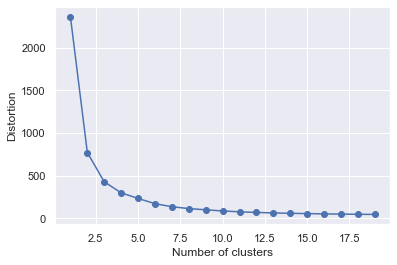

In [ ]:
plot_distortion(df_tracks_prep_norm3,1,20)

In [ ]:
# Identificar el valor de K, utilizando ahora el valor de la silueta

def plot_selectK_silhoute(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Number of clusters',
                    style = 'fivethirtyeight'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.style.use(style)
    plt.plot(range(k_min, k_max), silhouette_coefficients)
    plt.xticks(range(k_min, k_max))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

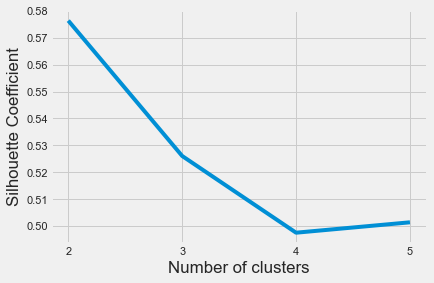

In [ ]:
# Esta función puede tomar bastantes minutos!!!
plot_selectK_silhoute(df_tracks_prep_norm3,
                    k_min=2, 
                    k_max=6)

### 6.4 Construir el modelo

In [ ]:
# Construimos un nuevo modelo, con las nuevas columnas y probaremos con k=2 y k=3
N_clusters=
kmeans3 = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans3 = kmeans3.fit(df_tracks_prep_norm3[name_cols_number])

In [ ]:
#Transformar el contenido de las columnas a arreglo
cols_number = df_tracks_prep_norm3.to_numpy()
cols_number

array([[0.05049581, 0.13955908, 0.98018868],
       [0.03153186, 0.16583209, 0.98962264],
       [0.03242801, 0.30578136, 0.99811321],
       ...,
       [0.03870385, 0.01359173, 0.95896226],
       [0.03601454, 0.28158939, 0.9990566 ],
       [0.02443068, 0.50146322, 0.97264151]])

### 6.5. Visualizar el resultado

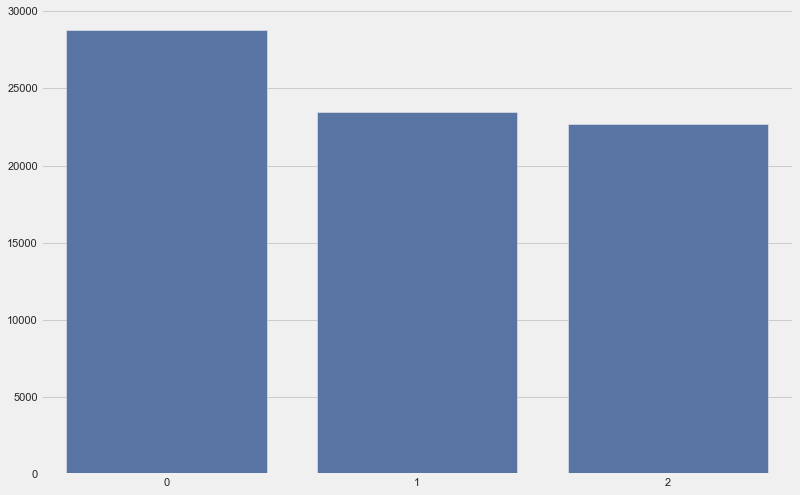

In [ ]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans3.labels_
df_tracks_prep_norm3['Cluster'] = labels

cluster_distrib = df_tracks_prep_norm3['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [ ]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_tracks_prep_norm3.groupby('Cluster').count()

,duration_ms,loudness,release_year
Cluster,,,
0,28784,28784,28784
1,23470,23470,23470
2,22667,22667,22667


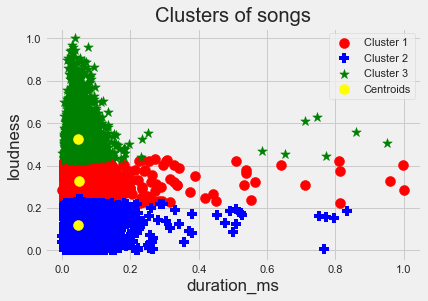

In [ ]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 0 y 1
plt.scatter(cols_number[kmeans3.labels_ == 0, 0], cols_number[kmeans3.labels_ == 0, 1], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans3.labels_ == 1, 0], cols_number[kmeans3.labels_ == 1, 1], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans3.labels_ == 2, 0], cols_number[kmeans3.labels_ == 2, 1], s = 100, marker='*', c = 'green', label = 'Cluster 3')
#plt.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()


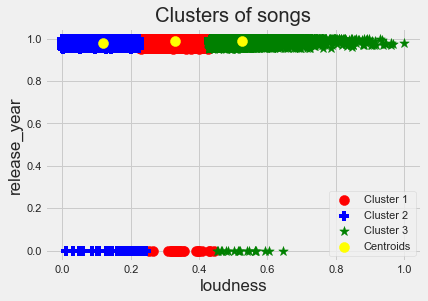

In [ ]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 1 y 2
plt.scatter(cols_number[kmeans3.labels_ == 0, 1], cols_number[kmeans3.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans3.labels_ == 1, 1], cols_number[kmeans3.labels_ == 1, 2], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans3.labels_ == 2, 1], cols_number[kmeans3.labels_ == 2, 2], s = 100, marker='*', c = 'green', label = 'Cluster 3')
#plt.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(name_cols_number[1])
plt.ylabel(name_cols_number[2])
plt.legend()
plt.show()


<span style="color:red"> ¿Qué nos está diciendo esta gráfica? </span>

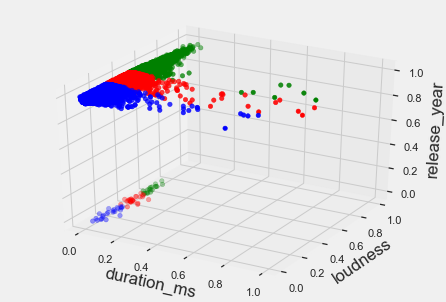

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[kmeans3.labels_ == 0, 0], cols_number[kmeans3.labels_ == 0, 1], cols_number[kmeans3.labels_ == 0, 2],color='red')
ax.scatter(cols_number[kmeans3.labels_ == 2, 0], cols_number[kmeans3.labels_ == 2, 1], cols_number[kmeans3.labels_ == 2, 2],color='green')
ax.scatter(cols_number[kmeans3.labels_ == 1, 0], cols_number[kmeans3.labels_ == 1, 1], cols_number[kmeans3.labels_ == 1, 2],color='blue')

ax.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], color='black',marker='o',s=200, label='centroids')
ax.set_xlabel(name_cols_number[0])
ax.set_ylabel(name_cols_number[1])
ax.set_zlabel(name_cols_number[2])
plt.show()

In [ ]:
# Revisar con cuidado esta parte para entender su aporte en la interpretación de los clústeres
from kmeans_interp.kmeans_feature_imp import KMeansInterp

n_clusters = len(df_tracks_prep_norm3['Cluster'].unique())

kms = KMeansInterp(n_clusters=n_clusters,
                   random_state=1, 
                   ordered_feature_names=name_cols_number,
                   feature_importance_method='wcss_min').fit(cols_number)

kms.feature_importances_


{0: [('release_year', 0.9865286849420015),
  ('loudness', 0.3304168398686171),
  ('duration_ms', 0.047848432406737286)],
 1: [('release_year', 0.9906109843368541),
  ('loudness', 0.5277284741496172),
  ('duration_ms', 0.04674846015160574)],
 2: [('release_year', 0.9813720590773124),
  ('loudness', 0.11848252482370367),
  ('duration_ms', 0.04719034909994768)]}

<Figure size 1440x576 with 0 Axes>

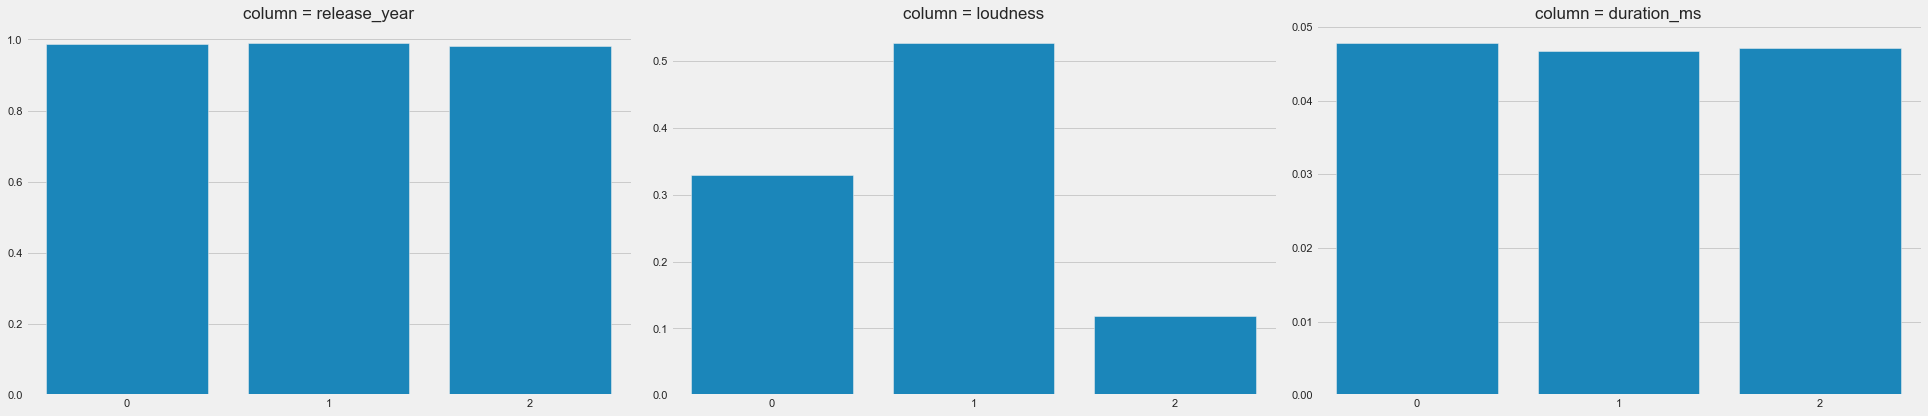

In [ ]:
#Plots
arr = []
for c in kms.feature_importances_:
    for col, val in kms.feature_importances_[c]:
        arr.append({'column':col, 'importance':val, 'cluster': c})

df_plot = pd.DataFrame(arr)
fig=plt.figure(figsize=(20,8))
g = sns.FacetGrid(df_plot, col="column", sharey = False, height = 6, aspect = 1.5)
g.map_dataframe(sns.barplot, x="cluster", y = 'importance')

<span style="color:red"> ¿Qué podemos concluir con lo que nos muestran las visualizaciones? Miremos con detalle lo ocurrido con las variables duration y loudness </span>

### 6.6. Evaluar la calidad de los clústeres obtenidos

[0 1 2]


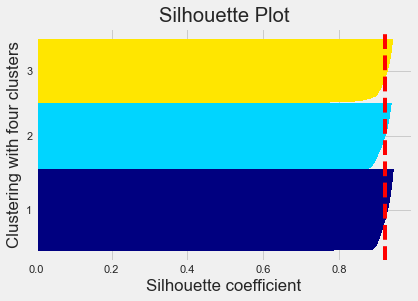

In [ ]:
plot_silhouette(data = df_tracks_prep_norm3, 
                labels = kmeans3.labels_, 
                ylabel = 'Clustering with four clusters')

### 6.7 Analizar y concluir
<span style="color:red"> Piensa en si este algoritmo es afectado por valores nulos, atípicos, dominios distintos de las variables, función de distancia. ¿Qué podemos decirle al negocio? ¿Las variables seleccionadas serán las apropiadas?
</span>

## 7. Concluir para dar una respuesta a la empresa